<a href="https://colab.research.google.com/github/kjm12misa/Google_drive/blob/main/Python/chapter03_2_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%2C_%EB%8B%A4%ED%95%AD%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

In [ ]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3) # 클래스 불러오기
knr.fit(train_input, train_target) # 모형학습(train_)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
print(knr.predict([[50]]))

[1033.33333333]


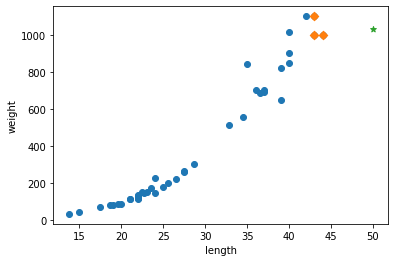

In [ ]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])
fig, ax = plt.subplots()
ax.scatter(train_input, train_target)
ax.scatter(train_input[indexes], train_target[indexes], marker='D')
ax.scatter(50, 1033, marker='*')
ax.set_xlabel('length')
ax.set_ylabel('weight')
plt.show()

길이 30 이하로는 농어의 무게는 엇비슷해 보이지만 길이 35정도 부터 길이 대비 무게의 차이가 급격히 늘어낫다. 농어는 길이와 무게가 높을 수록 포식자가 없는건가? 또한, 높을 수록 개체가 좀 없는 걸로 보아서는 사람들이 많이 잡아가는 것 같다. 농어 낚시에서 잡을 수 있는 길이 기준은?

In [ ]:
#print(np.mean(train_input[indexes])) # 43.333333333333336
print(np.mean(train_target[indexes])) # 1033.3333333333333

1033.3333333333333


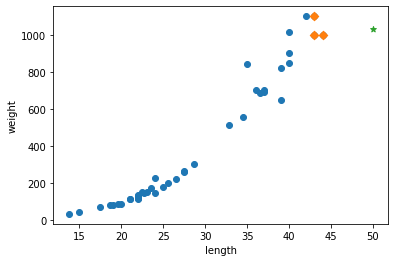

In [ ]:
# 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[100]])

fig, ax = plt.subplots()
ax.scatter(train_input, train_target) # (x축 data, y축 data)
ax.scatter(train_input[indexes], train_target[indexes], marker='D')
ax.scatter(50, 1033, marker='*')
ax.set_xlabel('length')
ax.set_ylabel('weight')
plt.show()

In [ ]:
print(knr.predict([[100]]))

[1033.33333333]


- 머신러닝 모델은 주기적으로 훈련해야 한다.
  + MLOps (Machine Learning & Operations)
  + 요즘 각광받는 데이터 관련 직업 필수 스킬
  + 입사와 하께 공부 시작(데이터 분석가, 머신러닝 엔지니어, 데이터 싸이언티스트)

#### 선형회귀
  - 통계
    + 5가지 가정들, 잔차의 정규성, 등분산성, 다중공선성, etc...
    + 종속변수 ~ 독립변수간의 '인과 관계'를 찾는 과정.
  - 머신러닝
    + R2 점수, MAE, MSE 등,, 평가지표 확인 더욱 중요.!!

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)
# 50으로 농어 예측
print(lr.predict([[50]]))

[1241.83860323]


Text(0, 0.5, 'weight')

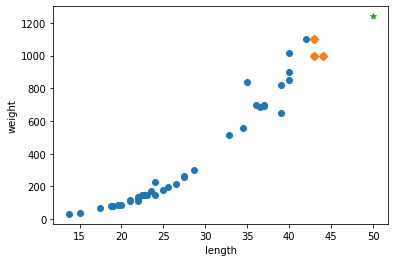

In [ ]:
fig, ax = plt.subplots()
ax.scatter(train_input, train_target) # (x축 data, y축 data)
ax.scatter(train_input[indexes], train_target[indexes], marker='D')
ax.scatter(50, 1241, marker='*')
ax.set_xlabel('length')
ax.set_ylabel('weight')

#### 회귀식 찾기
- **기울기** : 계수 = 가중치(딥러닝)

In [ ]:
# 기울기(coef_) + 상수(intercept_)
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


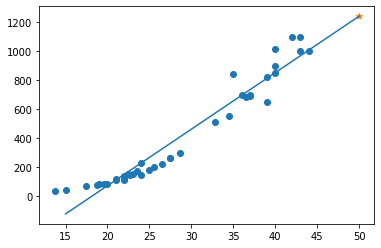

In [ ]:
# 15~50 까지의 기울기와 절편?
fig, ax = plt.subplots()
ax.scatter(train_input, train_target)
ax.plot([15, 50], [15 * lr.coef_ + lr.intercept_,
                   50 * lr.coef_ + lr.intercept_])
ax.scatter(50, 1241.8, marker='*')
plt.show()

#### 다항회귀
- 1차 방정식 -> 2차 방정식
- 넘파이 브로드캐스팅
  + 배열의 크기가 동일하면 상관 없음.
  + 배열의 크기가 다르고 연산을 할 때 브로드캐스팅 원리가 적용
  + 튜토리얼 등 찾아서 주기적으로 공부(데이터 분석가, 머신러닝 ~)

In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


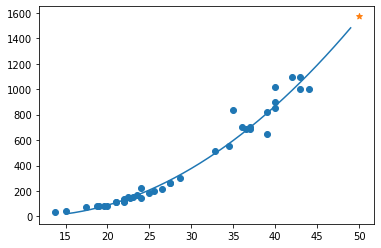

In [ ]:
point = np.arange(15, 50)

fig, ax = plt.subplots()
ax.scatter(train_input, train_target)
ax.plot(point, 1.01*point**2 - 21.6*point + 116.05)
ax.scatter(50, 1574, marker='*')
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


여전히 테스트 점수가 좀 더 높게 나오기엥 과소적합이 아직 남아 있는 것 같다.
조금 더 복잡한 모델이 필요 할 꺼라는 결말이 책에 적혀 있음.

KNN의 문제점
- 농어의 길이가 길어져도 무게는 동일함(현실성 제로)
  + 단순 선형회귀(1차 방정식) : 치어가 1cm인데 무게가 음수로 나옴(현실성 제로)
  + 다항회귀(2차 방정식) : 문제점을 완화.